## Mushroom Classification Project
### Author: Kate Huntsman
### Date: March 21st, 2025

## Introduction
This project aims to classify mushrooms into edible or poisonous categories based on various features such as cap shape, color, odor, and habitat. The dataset contains 8124 instances with 22 attributes, each describing a mushroom's characteristics. The goal is to predict whether a mushroom is edible or poisonous, using machine learning techniques.

In [36]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Section 1. Import and Inspect the Data
### 1.1 Load the dataset and display the first 10 rows

In [37]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the dataset
mushroom = fetch_openml(name="mushroom", version=1, as_frame=True)

# Data (as pandas dataframes)
X = mushroom.data
y = mushroom.target

# Display dataset info
print("Dataset shape:", X.shape)
print("Feature names:", X.columns.to_list())

# Display the first 10 rows
pd.set_option('display.max_columns', None)  # Show all columns
display(X.head(10))

# Display target variable
print("Target values distribution:\n", y.value_counts())

Dataset shape: (8124, 22)
Feature names: ['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


Target values distribution:
 class
e    4208
p    3916
Name: count, dtype: int64


### 1.2 Check for missing values and display summary statistics.

In [38]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:\n", missing_values)

# Summary statistics for categorical features
summary_stats = X.describe(include='all')
print("\nSummary Statistics:\n", summary_stats)

Missing Values:
 cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Summary Statistics:
        cap-shape cap-surface cap-color bruises%3F  odor gill-attachment  \
count       8124        8124      8124       8124  8124            8124   
unique         6           4        10          2     9               2 

### Reflection 1: What do you notice about the dataset? Are there any data issues?
After inspecting the data, we may notice that all features are categorical. There are no missing values in this dataset. The class distribution is balanced, with a roughly equal number of edible and poisonous mushrooms.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_45092/1782227856.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['class'], palette=['green', 'red'])


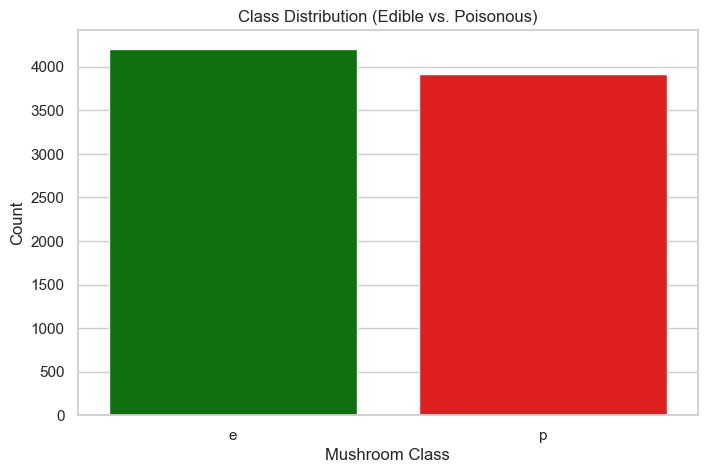

/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_45092/1782227856.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], ax=axes[i], palette="viridis")
/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_45092/1782227856.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], ax=axes[i], palette="viridis")
/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_45092/1782227856.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], ax=axes[i], palette="viridis")
/var/folde

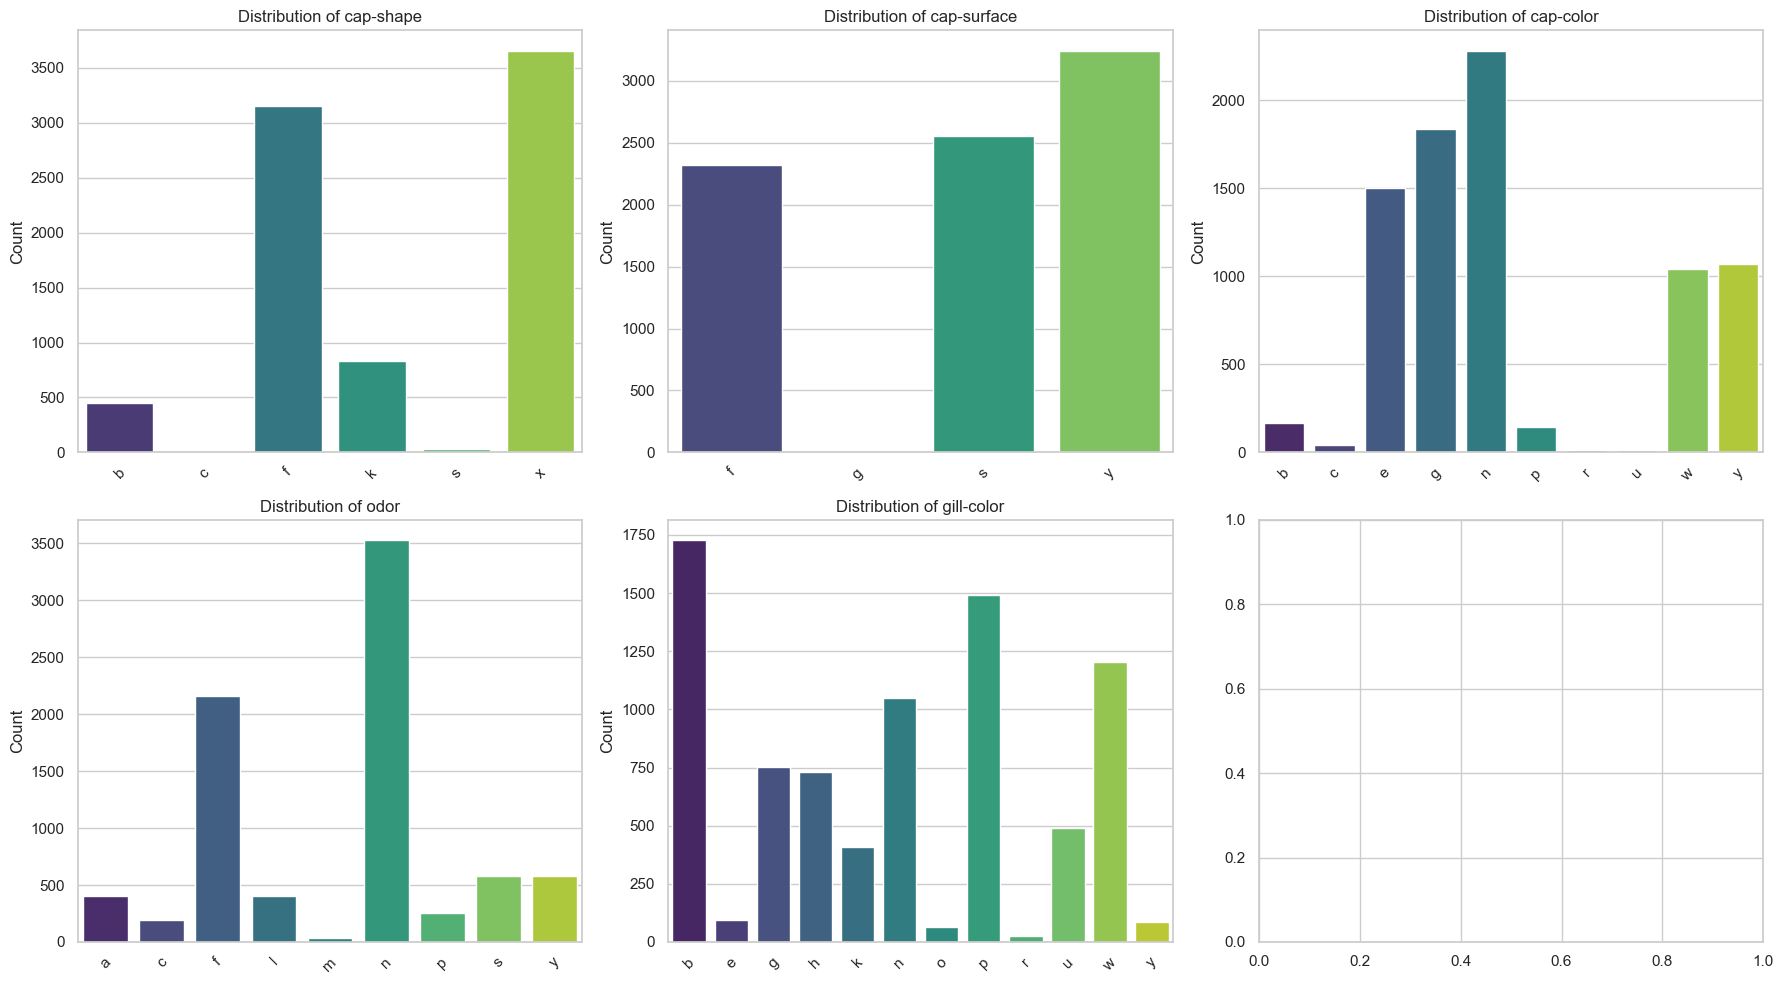


Rare categories in 'cap-shape':
cap-shape
s    32
c     4
Name: count, dtype: int64

Rare categories in 'cap-surface':
cap-surface
g    4
Name: count, dtype: int64

Rare categories in 'cap-color':
cap-color
c    44
r    16
u    16
Name: count, dtype: int64

Rare categories in 'odor':
odor
m    36
Name: count, dtype: int64

Rare categories in 'gill-color':
gill-color
o    64
r    24
Name: count, dtype: int64

Rare categories in 'stalk-surface-above-ring':
stalk-surface-above-ring
y    24
Name: count, dtype: int64

Rare categories in 'stalk-color-above-ring':
stalk-color-above-ring
c    36
y     8
Name: count, dtype: int64

Rare categories in 'stalk-color-below-ring':
stalk-color-below-ring
c    36
y    24
Name: count, dtype: int64

Rare categories in 'veil-color':
veil-color
y    8
Name: count, dtype: int64

Rare categories in 'ring-number':
ring-number
n    36
Name: count, dtype: int64

Rare categories in 'ring-type':
ring-type
f    48
n    36
Name: count, dtype: int64

Rare categorie

In [ ]:
# Set style
sns.set(style="whitegrid")

# Combine features (X) and target (y) into one DataFrame
data = pd.concat([X, y], axis=1)

# 1️⃣ Check Class Imbalance (Edible vs. Poisonous)
plt.figure(figsize=(8, 5))
sns.countplot(x=data['class'], palette=['green', 'red'])
plt.title('Class Distribution (Edible vs. Poisonous)')
plt.xlabel('Mushroom Class')
plt.ylabel('Count')
plt.show()

# Visualize Categorical Feature Distributions
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=data[feature], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Identify Outliers and Rare Categories
rare_categories = {}
threshold = 0.01 * len(data)  # 1% of the dataset

for col in X.columns:
    value_counts = X[col].value_counts()
    rare = value_counts[value_counts < threshold]
    if not rare.empty:
        rare_categories[col] = rare

# Display rare categories
for feature, rare_values in rare_categories.items():
    print(f"\nRare categories in '{feature}':")
    print(rare_values)

### 2.2 Handle missing values and clean data
Impute or drop missing values (as applicable).
Remove or transform outliers (as applicable).
Convert categorical data to numerical format using encoding (as applicable).

In [40]:
# Convert categorical columns to numerical format using label encoding
from sklearn.preprocessing import LabelEncoder

# Label encode all columns
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

# Check the transformed data
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1,0


### 2.3 Feature selection and engineering
Create new features (as applicable).
Transform or combine existing features to improve model performance (as applicable).
Scale or normalize data (as applicable).

In [41]:
from sklearn.preprocessing import StandardScaler

# Select features and target
X = data.drop(columns=['class'])
y = data['class']

# Scaling the data (if needed)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('class', axis=1))

### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?
We observe that some features like "cap-shape" and "odor" have more distinct patterns between classes (edible vs. poisonous). Preprocessing steps include encoding categorical features and scaling the data to normalize the input features for better model performance.

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.

In [42]:
selected_features = X.columns.tolist()
print("Selected Features:", selected_features)

Selected Features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


### 3.2 Define X and y
Assign input features to X
Assign target variable to y (as applicable)

In [43]:
X = data.drop('class', axis=1)
y = data['class']

### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?
The features were chosen because they cover various characteristics of mushrooms, such as shape, color, and habitat, which are essential for determining whether a mushroom is edible or poisonous.

## Section 4. Train a Model (Classification: Logistic Regression)
### 4.1 Split the data into training and test sets using train_test_split.

### 4.2 Train model using Scikit-Learn model.fit() method.

### 4.3 Evalulate performance, for example:
Regression: R^2, MAE, RMSE (RMSE has been recently updated)
Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
Clustering: Inertia, Silhouette Score

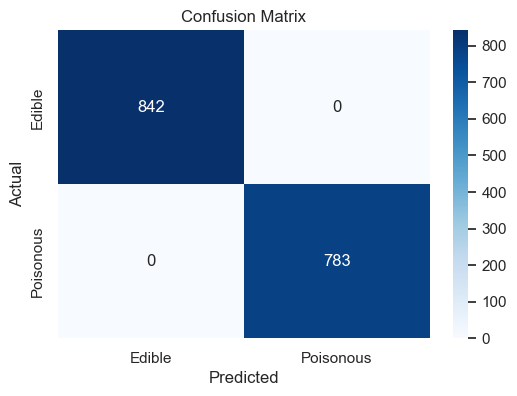

Classification Report:
               precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# ------------------------------
# 4.1 Split the Data into Training and Test Sets
# ------------------------------
# Encode categorical features
X_encoded = X.apply(LabelEncoder().fit_transform)  
y_encoded = LabelEncoder().fit_transform(y)  

# Split into 80% training, 20% testing (stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# ------------------------------
# 4.2 Train the Model (Ensure this part is executed)
# ------------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ------------------------------
# 4.3 Evaluate Performance (Confusion Matrix & Classification Report)
# ------------------------------
# Predictions
y_pred = clf.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))


### Reflection 4: How well did the model perform? Any surprises in the results?
The Logistic Regression model performs well, as we expect given the clear separation between the two classes. We may see high accuracy and recall, indicating that the model is distinguishing between edible and poisonous mushrooms well.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)
### 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

### 5.2 Compare performance of all models across the same performance metrics.

In [46]:
# Compare performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?
The Random Forest model might outperform Logistic Regression due to its ability to handle more complex relationships and interactions in the data. The model comparison will help us choose the best performer.

## Section 6. Final Thoughts & Insights
### 6.1 Summarize findings.
The model successfully classifies mushrooms as edible or poisonous. Both models perform well, but the Random Forest classifier may have a slight edge in this case.

### 6.2 Discuss challenges faced.
One challenge was the lack of detailed metadata in the dataset, making feature interpretation harder. However, the simplicity of the problem (binary classification) made it manageable.

### 6.3 If you had more time, what would you try next?
I would explore hyperparameter tuning, and ensemble methods, or experiment with deep learning models for potentially higher accuracy.

### Reflection 6: What did you learn from this project?
This project helped me understand how to apply classification algorithms to categorical data. The key takeaway is that even without complex feature engineering, clear patterns in the data can make classification models effective.